In [214]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [215]:
#Data Presentation

In [216]:
# Load the data: temp
temp = pd.read_csv("temperat.csv",sep=";")
temp=temp.rename(columns={'Unnamed: 0': 'Ville'})
print(temp)

            Ville  Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
0       Amsterdam      2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
1         Athenes      9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
2          Berlin     -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
3       Bruxelles      3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
4        Budapest     -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
5      Copenhague     -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
6          Dublin      4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
7        Helsinki     -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
8            Kiev     -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
9        Cracovie     -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
10       Lisbonne     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   
11        Londres      3.4      4.2   5.5    8.3  11

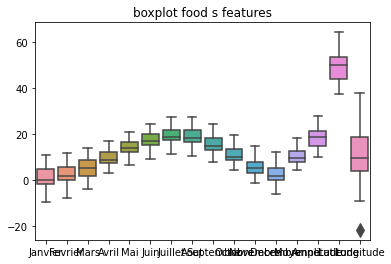

In [217]:
# Boxplot for food
plt.figure()
plt.title('boxplot food s features')
temp_box=sns.boxplot(data=temp,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.show()

In [218]:
 #With this representation, we do not visually extract some clusters. We however remark that,  shows a lot of outliers.

In [219]:
temp.describe()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,49.051429,10.748571
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.096328,12.229145
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,3.800000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


In [220]:
#We're gonna try to find clusters with lat/long and average temperature

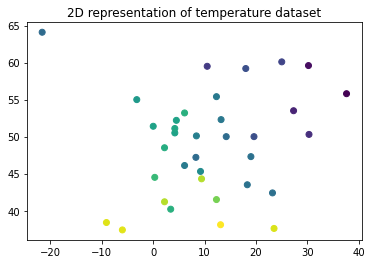

In [221]:
# Representation of the temperature dataset
plt.title('2D representation of temperature dataset')
plt.scatter(temp['Longitude'],temp['Latitude'], c=temp['Decembre'])

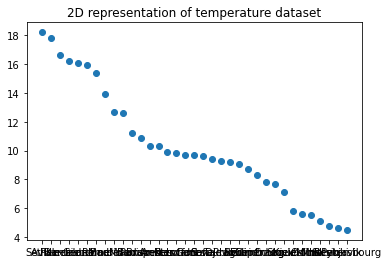

In [222]:
# Representation of the temperature dataset
plt.title('2D representation of temperature dataset')
plt.scatter(temp_sorted['Ville'],temp_sorted['Moyenne'])

In [223]:
#We can say that latitude and longitude are highly correlated 

In [226]:
#This is the code to display a map, with whichever attribute we want

import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

#We select the file we're going to use
file=temp
champ_etudie='Moyenne'

linear=cm.linear.RdYlBu_06.scale(0, 1)


m = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[champ_etudie]), 
                        line_color=None,
                        fill_color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min())),
                        fill_opacity=1,
                        color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min()))).add_to(m)

In [227]:
m

In [235]:
# We apply K-means algorithm and calculate Silhouette index for a given number of clusters
# (Remark: it is a little difficult to visualize, since it is dimension 5)

temp_we_drop=temp[['Ville','Region','Latitude','Longitude']]

new_temp = temp.drop(['Ville','Region','Latitude','Longitude'], axis=1)

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n, n_init=10).fit(new_temp) # Clustering with the given number of clusters
    cluster_labels = kmeans_temp.labels_ # Extract the labels
    silhouette_avg = silhouette_score(new_temp, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.5187111529098996
For n = 3 Silhouette_score: 0.4831014618030819
For n = 4 Silhouette_score: 0.45419340361377014
For n = 5 Silhouette_score: 0.4718324275058679
For n = 6 Silhouette_score: 0.4532401102390238
For n = 7 Silhouette_score: 0.41816204883364716
For n = 8 Silhouette_score: 0.40298110668876747
For n = 9 Silhouette_score: 0.40010074317679756
For n = 10 Silhouette_score: 0.35710311317619187


In [236]:
#We think K=5 would be the best

kmeans = KMeans(n_clusters=5,n_init=10,init='random').fit(new_temp)

new_temp_with_labels=pd.concat([temp,pd.DataFrame(data=kmeans.labels_,columns=['label'])], axis=1, sort=False)

In [238]:
#We are going to diplay the results of kmeans for k=5


import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

#We select the file we're going to use
file=new_temp_with_labels
champ_etudie='label'

linear=cm.linear.RdYlBu_06.scale(0, 1)


m = folium.Map(tiles='cartodbpositron', zoom_start=3 ,location=[48.499998 ,23.3833318])

for index,row in file.iterrows():
#     keyon_cluster = folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Ville']).add_to(m)
    folium.CircleMarker(location=[row['Latitude'],row['Longitude']], 
                        radius=5,
                        popup=str(row['Ville'])+': '+str(row[champ_etudie]), 
                        line_color=None,
                        fill_color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min())),
                        fill_opacity=1,
                        color=linear(1-(row[champ_etudie]-file[champ_etudie].min())/(file[champ_etudie].max()-file[champ_etudie].min()))).add_to(m)
    
m

In [240]:
#Now we are going to perform hierarchical clustering

# We standardize the columns of interest
new_temp_scaled=pd.DataFrame(scale(new_temp),columns=new_temp.columns,index=new_temp.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe


# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(new_temp_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[ 3.         23.          0.2452606   2.        ]
 [27.         28.          0.27224942  2.        ]
 [24.         29.          0.463755    2.        ]
 [ 2.         34.          0.53541036  2.        ]
 [ 0.         35.          0.55847518  3.        ]
 [17.         20.          0.58957667  2.        ]
 [21.         40.          0.66971459  3.        ]
 [15.         22.          0.69016385  2.        ]
 [11.         39.          0.84563585  4.        ]
 [ 6.         26.          0.90718783  2.        ]
 [ 1.         32.          1.00369206  2.        ]
 [19.         37.          1.00543641  3.        ]
 [36.         41.          1.06637089  5.        ]
 [13.         14.          1.11880115  2.        ]
 [ 7.         42.          1.30518468  3.        ]
 [ 8.          9.          1.37428625  2.        ]
 [33.         48.          1.40725927  3.        ]
 [16.         43.          1.41071655  5.        ]
 [38.         47.          1.47244622  7.        ]
 [ 4.         30.          1.50

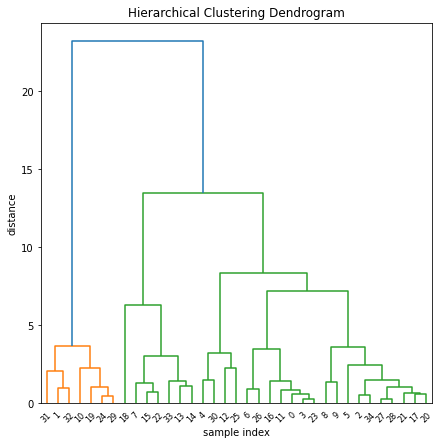

In [241]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(new_temp_scaled, 'ward')
)
plt.show()